<a href="https://colab.research.google.com/github/cita-delta/DataScience/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"citadelta","key":"84e820cecac23dbd2404fc11c46e1a3e"}'}

In [4]:
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [5]:
! mkdir ~/.kaggle

In [6]:
!mv ./kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           3606        607  0.9375           
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            519        544  0.9375           
datasets/muratkokludataset/pistachio-dataset                                   Pistachio Dataset                                  2MB  2022-04-03 08:38:21            358        473  0.9375           


In [9]:
! kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease


  0% 0.00/3.13M [00:00<?, ?B/s]
100% 3.13M/3.13M [00:00<00:00, 220MB/s]


In [10]:
# import library
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
df = pd.read_csv('personal-key-indicators-of-heart-disease.zip')

In [12]:
# check first 5 records
df.head(n=5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


A reliable dataset has 5 essential features:

1.   Validity
2.   Accuracy
3.   Completeness
4.   Consistency
5.   Uniformity

In [13]:
df.isna()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum() #show not available data

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

There is no missing data but a lot of column entries are non numerical values. We need to fix them into meaningful numerical values such that we can work with the data.

Binary options Yes/No are simply replaced with 1/0. Bare political correctness, sex options will too be treated with binary 0/1 options. 

In [15]:
df_1 = df.replace(to_replace = ["No", "Yes", "Male", "Female"],
                           value = [0, 1, 0, 1])

Next is AgeCategory. Every older category will be assigned an increasing value. The same will be done for GenHealth.

In [16]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [17]:
df_2 = df_1.replace(to_replace = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80 or older" ],
                           value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [18]:
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [19]:
df_3 = df_2.replace(to_replace = ["Poor", "Fair", "Good", "Very good", "Excellent"],
                           value = [0, 1, 2, 3, 4])

Lastly we are left with two issues "Race" and the "No, borderline diabetes" entry. The latter will be converted to 0.5 symbolising an inbetween state. "Race" will be solved with One-Hot encoding.

In [20]:
df_4 = df_3.replace(to_replace = ["No, borderline diabetes"],
                           value = [0.5])

In [21]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [22]:
df_5 = pd.get_dummies(df_4, columns=['Race'], prefix=['Race']) #create new columns where each category is assigned 0/1

In [23]:
df_5.head(n=20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,1,7,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,9,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,1,11,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,...,8.0,0,0,0,0,0,0,0,0,1
5,1,28.87,1,0,0,6.0,0.0,1,1,11,...,12.0,0,0,0,0,0,1,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,1,10,...,4.0,1,0,1,0,0,0,0,0,1
7,0,31.64,1,0,0,5.0,0.0,1,1,12,...,9.0,1,0,0,0,0,0,0,0,1
8,0,26.45,0,0,0,0.0,0.0,0,1,12,...,5.0,0,1,0,0,0,0,0,0,1
9,0,40.69,0,0,0,0.0,0.0,1,0,9,...,10.0,0,0,0,0,0,0,0,0,1


As we see here, we are only left with a singular problem. Somewhere in the Diabetic column, a string value is hidden.

In [24]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  Diabetic                             319795 non-null  object 
 11  PhysicalActiv

In [25]:
df_5['Diabetic'].value_counts()

0                         269653
1                          40802
0.5                         6781
Yes (during pregnancy)      2559
Name: Diabetic, dtype: int64

While it is not unreasonable to claim that borderline diabetic people are in an inbetween state, the issue of diabetic during pregnancy should be treated seperately. It will therefore be assigned it's own column.

In [26]:
df_5['DiabeticPreg'] = df_5['Diabetic'] #duplicate "Diabetic" column

In [27]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  Diabetic                             319795 non-null  object 
 11  PhysicalActiv

In [28]:
# make DiabeticPreg a column where every entry except "Yes (during pregnancy)" is 0 and said entry is 1
df_5['DiabeticPreg'] = df_5['DiabeticPreg'].replace(to_replace = ["Yes (during pregnancy)", 1, 0.5],
                           value = [1, 0, 0])

In [29]:
# fix the Diabetic column such that "Yes (during pregnancy)" is 0
df_5['Diabetic'] = df_5['Diabetic'].replace(to_replace = ["Yes (during pregnancy)"], 
                           value = [0])

In [30]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  Diabetic                             319795 non-null  float64
 11  PhysicalActiv

Now every column only features numerical values. 

Some general statistics:

In [31]:
df_5.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,DiabeticPreg
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,6.514536,...,0.134061,0.036833,0.093244,0.016267,0.025229,0.071730,0.085824,0.034172,0.766779,0.008002
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,...,0.340718,0.188352,0.290775,0.126499,0.156819,0.258041,0.280104,0.181671,0.422883,0.089095
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Exploring the data:

In [32]:
pd.crosstab(df.HeartDisease, df.Sex)

Sex,Female,Male
HeartDisease,,
No,156571,135851
Yes,11234,16139


Even though more women are represented in the data, men more often reported a heart disease.

In [33]:
df_5['HeartDisease'].sum()/len(df_5)

0.08559545959130067

8.6% reported a heart disease.

In [34]:
# takes the entries of women and groubs them by heart disease while converting them into a percentage
df_5[df_5.Sex == 1].Sex.groupby(df_5.HeartDisease).count()/len(df_5[df_5.Sex == 1])

HeartDisease
0    0.933053
1    0.066947
Name: Sex, dtype: float64

Women with heart diesease: 6.7%

In [35]:
df_5[df_5.Sex == 0].Sex.groupby(df_5.HeartDisease).count()/len(df_5[df_5.Sex == 0])

HeartDisease
0    0.893815
1    0.106185
Name: Sex, dtype: float64

Men with heart diesease: 10.1%

Here is the percentage of cases of heart disease by age category. Clearly the older the more common:

In [36]:
df_5[['AgeCategory', 'HeartDisease']].groupby(['AgeCategory']).mean()*100

,HeartDisease
AgeCategory,
0,0.617167
1,0.784429
2,1.205141
3,1.440389
4,2.313625
5,3.414254
6,5.448743
7,7.399940
8,9.876507


In [37]:
df_5.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,DiabeticPreg
0,0,16.60,1,0,0,3.0,30.0,0,1,7,...,1,0,1,0,0,0,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,0,0,0,0,0,0,0,0,1,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,...,1,0,0,0,0,0,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,...,0,0,1,0,0,0,0,0,1,0
4,0,23.71,0,0,0,28.0,0.0,1,1,4,...,0,0,0,0,0,0,0,0,1,0


In [38]:
df_5.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,DiabeticPreg
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,-0.070040,0.233432,...,0.041444,0.145197,0.093317,0.008547,-0.030262,-0.010156,-0.036163,-0.003039,0.040121,-0.013930
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,-0.026940,-0.004744,...,0.092345,0.050768,-0.033644,0.026347,-0.078643,0.080672,0.023750,0.012535,-0.049060,0.008198
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,-0.085052,0.128331,...,0.024149,0.034920,0.033977,0.035667,-0.060308,-0.038249,-0.066873,0.016205,0.072367,-0.005385
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,-0.004200,-0.059528,...,-0.002202,-0.028280,-0.005702,-0.004243,-0.022275,-0.025980,-0.015554,0.005455,0.033342,-0.004077
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,0.003091,0.137822,...,0.038866,0.091167,0.048116,0.014357,-0.016060,0.024819,-0.025823,0.005743,0.001154,-0.004526
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,0.040904,0.110763,...,0.117907,0.142197,0.041700,0.022955,-0.035229,0.011371,-0.005571,0.016102,-0.003968,-0.000773
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,0.100058,-0.155506,...,0.114008,0.037281,-0.033412,0.018394,-0.023113,0.010944,0.011167,0.031385,-0.024489,0.018742
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,0.068860,0.243263,...,0.103222,0.153064,0.064840,0.025205,-0.038830,0.039615,-0.008214,0.008483,-0.015516,-0.007040
Sex,-0.070040,-0.026940,-0.085052,-0.004200,0.003091,0.040904,0.100058,0.068860,1.000000,0.067478,...,0.069191,0.009084,-0.013434,0.003434,-0.013716,0.037280,0.003607,-0.008762,-0.017314,0.085477
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,0.067478,1.000000,...,-0.058108,0.123190,0.263537,-0.025190,-0.083885,-0.034980,-0.162338,-0.061239,0.193823,-0.034063


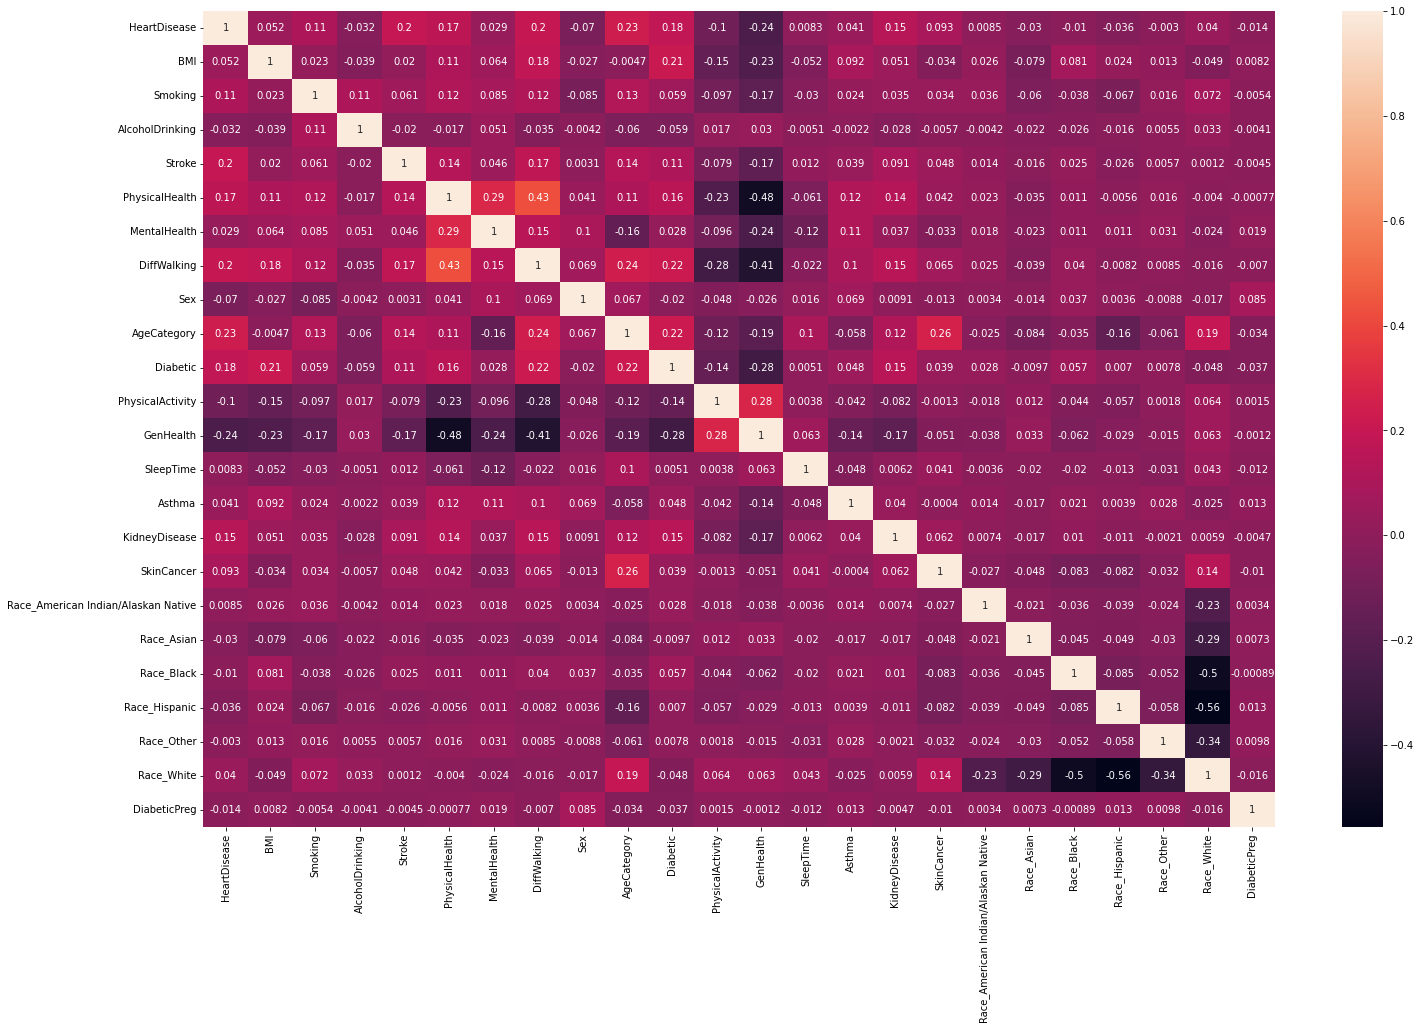

In [39]:
plt.figure(figsize=(24, 15))
ax = sns.heatmap(df_5.corr(), annot=True)

None of the features has a correlation > 0.3 with respect to "HeartDisease" and can therefore be considered relevant. Age, strokes, kidney diseases or a difficulty in walking correlate positively whereas health in general and phyical activity negatively. 

To apply linear regression we have to remove variables that are uncorrelated with respect to to the target variable (1) but also variables that correlate with other variables (2). 

(1) Race, DiabeticPreg, SleepTime, Sex, MentalHealth, Alcohol, BMI, Asthma

In [40]:
#remove certain columns
df_lg = df_5.drop(columns=['SleepTime', 'Sex', 'MentalHealth', 'AlcoholDrinking', 'BMI', 'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_White', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'DiabeticPreg', 'Asthma'])

In [41]:
df_lg.head(5)

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,KidneyDisease,SkinCancer
0,0,1,0,3.0,0,7,1.0,1,3,0,1
1,0,0,1,0.0,0,12,0.0,1,3,0,0
2,0,1,0,20.0,0,9,1.0,1,1,0,0
3,0,0,0,0.0,0,11,0.0,0,2,0,1
4,0,0,0,28.0,1,4,0.0,1,3,0,0


(2) PhysicalHealth, DiffWalking

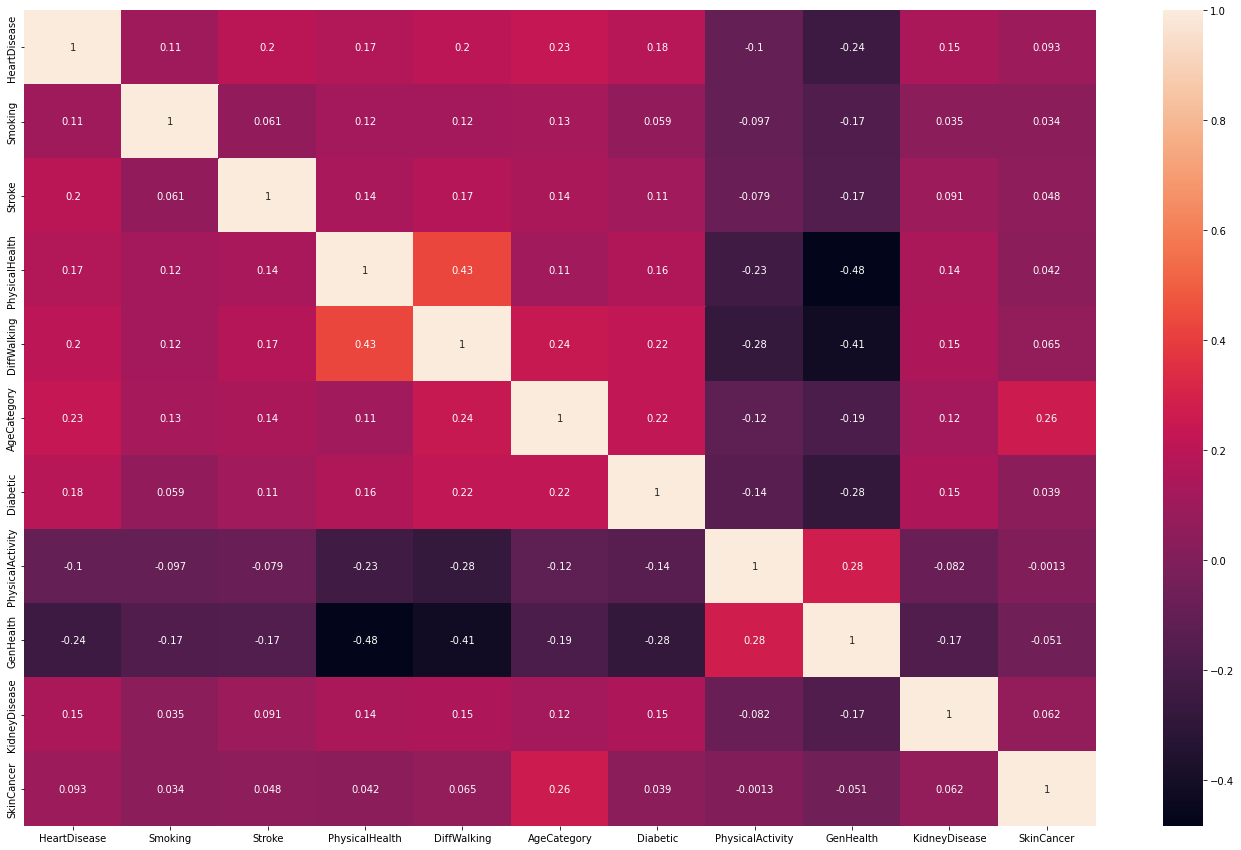

In [42]:
df_lg.corr()
plt.figure(figsize=(24, 15))
ax = sns.heatmap(df_lg.corr(), annot=True)

In [43]:
df_lg2 = df_lg.drop(columns=['PhysicalHealth', 'DiffWalking'])

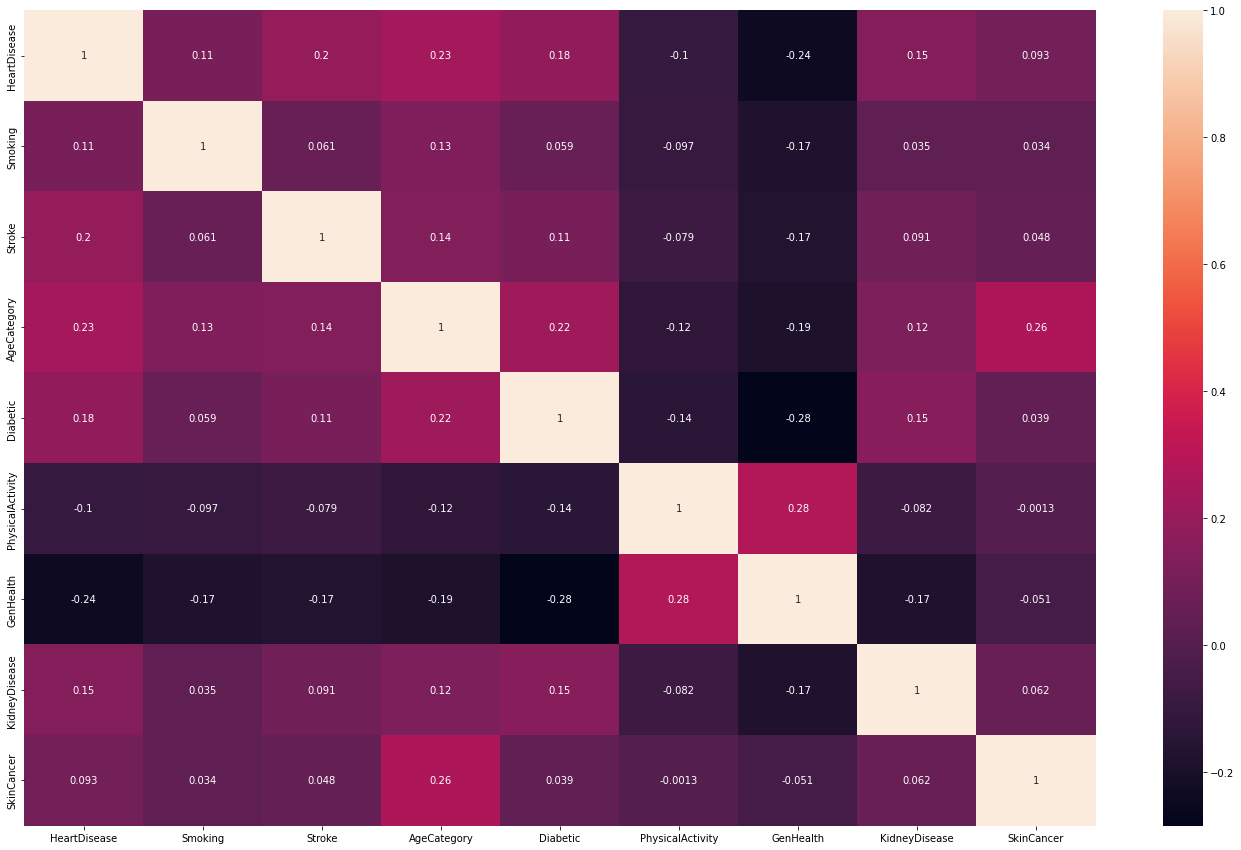

In [44]:
df_lg2.corr()
plt.figure(figsize=(24, 15))
ax = sns.heatmap(df_lg2.corr(), annot=True)

In [45]:
# define features and labels
features = df_lg2[['SkinCancer', 'KidneyDisease', 'GenHealth', 'PhysicalActivity', 'Diabetic', 'AgeCategory', 'Stroke', 'Smoking']]
labels = df_lg2['HeartDisease']

In [46]:
# splitting into 80% for training and 20% for validation
train_df = df_lg2[:int(len(df_lg2)*0.8)]
val_df = df_lg2[int(len(df_lg2)*0.8):]

In [47]:
print('\nData in Train:')
print(train_df['HeartDisease'].value_counts())

print('\nData in Val:')
print(val_df['HeartDisease'].value_counts())


Data in Train:
0    233851
1     21985
Name: HeartDisease, dtype: int64

Data in Val:
0    58571
1     5388
Name: HeartDisease, dtype: int64


There is too many negative cases. This has to be adjusted.

In [48]:
# creates two series with pos/neg entries and concatenates them, adjusting for length
class_0 = train_df[train_df['HeartDisease'] == 0]
class_1 = train_df[train_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_df = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(train_df['HeartDisease'].value_counts())

Data in Train:
0    233851
1    233851
Name: HeartDisease, dtype: int64


In [49]:
class_0 = val_df[val_df['HeartDisease'] == 0]
class_1 = val_df[val_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
val_df = pd.concat([class_0, class_1], axis=0)
print('Data in Test:')
print(val_df['HeartDisease'].value_counts())

Data in Test:
0    58571
1    58571
Name: HeartDisease, dtype: int64


Here some arrays are created to train the model.

In [50]:
x_train = np.array(train_df[['SkinCancer', 'KidneyDisease', 'GenHealth', 'PhysicalActivity', 'Diabetic', 'AgeCategory', 'Stroke', 'Smoking']])
y_train = np.array(train_df['HeartDisease'])

x_val = np.array(val_df[['SkinCancer', 'KidneyDisease', 'GenHealth', 'PhysicalActivity', 'Diabetic', 'AgeCategory', 'Stroke', 'Smoking']])
y_val = np.array(val_df['HeartDisease'])

Model

In [51]:
rf = RandomForestClassifier().fit(x_train, y_train)

y_pred = rf.predict(x_val)

print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74     58571
           1       0.73      0.75      0.74     58571

    accuracy                           0.74    117142
   macro avg       0.74      0.74      0.74    117142
weighted avg       0.74      0.74      0.74    117142



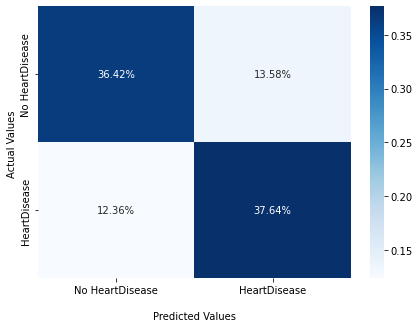

In [52]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()